# Naive Bayes classification {-}

This repository aims at familiarizing with training and testing Naive Bayes model.

- Load the dataset.
- Analyze the dataset.
- Split the dataset into training, validation and test set.
- Train a Gaussian Naive Bayes (GaussianNB, https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) model and find the best set of hyperparameters (var_smoothing hyperparameter) using validation set and cross validation technique (see GridSearchCV )
- Train a Mixed Naive Bayes (MixedNB, https://pypi.org/project/mixed-naive-bayes/) model.
- Evaluate and compare the model performance of GaussianNB and MixedNB on the test set using the following metrics: precision, recall, f1-score.

The dataset will be working on is 'travel-insurance.csv'. It is composed of attributes such as age, employment type, etc, to predict if a customer is going to buy a travel insurance.


**1. Load the dataset**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("travel-insurance.csv")
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


Here follows the list of columns in the dataset:

* Age - Age of the customer
* Employment Type - The sector in which customer is employed
* GraduateOrNot - Whether the customer is college graduate or not
* AnnualIncome - The yearly income of the customer in indian rupees
* FamilyMembers - Number of members in customer's family
* ChronicDisease - Whether the customer suffers from any major disease or conditions like diabetes/high BP or asthama, etc.
* FrequentFlyer - Derived data based on customer's history of booking air tickets on atleast 4 different instances in the last 2 Years (2017-2019).
* EverTravelledAbroad - Has the customer ever travelled to a foreign country.
* TravelInsurance: (label) Did the customer buy travel insurance package during introductory offering held in the year 2019.

**2. Analyze the dataset**

In [ ]:
# Get some basic data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [ ]:
# Drop "Unnamed:0" column as it does not contain useful information for building the model
df = df.drop(columns=['Unnamed: 0'], axis=1)

In [ ]:
# To know different employment types included
df['Employment Type'].value_counts()

Private Sector/Self Employed    1417
Government Sector                570
Name: Employment Type, dtype: int64

In [ ]:
# Select categorical variables columns
cat_cols = [col for col in df.columns if df[col].dtypes == "O"]

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=cat_cols)

# Show the dataframe
df

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed,GraduateOrNot_No,GraduateOrNot_Yes,FrequentFlyer_No,FrequentFlyer_Yes,EverTravelledAbroad_No,EverTravelledAbroad_Yes
0,31,400000,6,1,0,1,0,0,1,1,0,1,0
1,31,1250000,7,0,0,0,1,0,1,1,0,1,0
2,34,500000,4,1,1,0,1,0,1,1,0,1,0
3,28,700000,3,1,0,0,1,0,1,1,0,1,0
4,28,700000,8,1,0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,33,1500000,4,0,1,0,1,0,1,0,1,0,1
1983,28,1750000,5,1,0,0,1,0,1,1,0,0,1
1984,28,1150000,6,1,0,0,1,0,1,1,0,1,0
1985,34,1000000,6,0,1,0,1,0,1,0,1,0,1


In [ ]:
# Show some statistics of each variable in dataset
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance,Employment Type_Government Sector,Employment Type_Private Sector/Self Employed,GraduateOrNot_No,GraduateOrNot_Yes,FrequentFlyer_No,FrequentFlyer_Yes,EverTravelledAbroad_No,EverTravelledAbroad_Yes
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323,0.286865,0.713135,0.148465,0.851535,0.790136,0.209864,0.808757,0.191243
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332,0.452412,0.452412,0.355650,0.355650,0.407314,0.407314,0.393379,0.393379
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#check whether there are missing values
df.isnull().sum()

Age                                             0
AnnualIncome                                    0
FamilyMembers                                   0
ChronicDiseases                                 0
TravelInsurance                                 0
Employment Type_Government Sector               0
Employment Type_Private Sector/Self Employed    0
GraduateOrNot_No                                0
GraduateOrNot_Yes                               0
FrequentFlyer_No                                0
FrequentFlyer_Yes                               0
EverTravelledAbroad_No                          0
EverTravelledAbroad_Yes                         0
dtype: int64

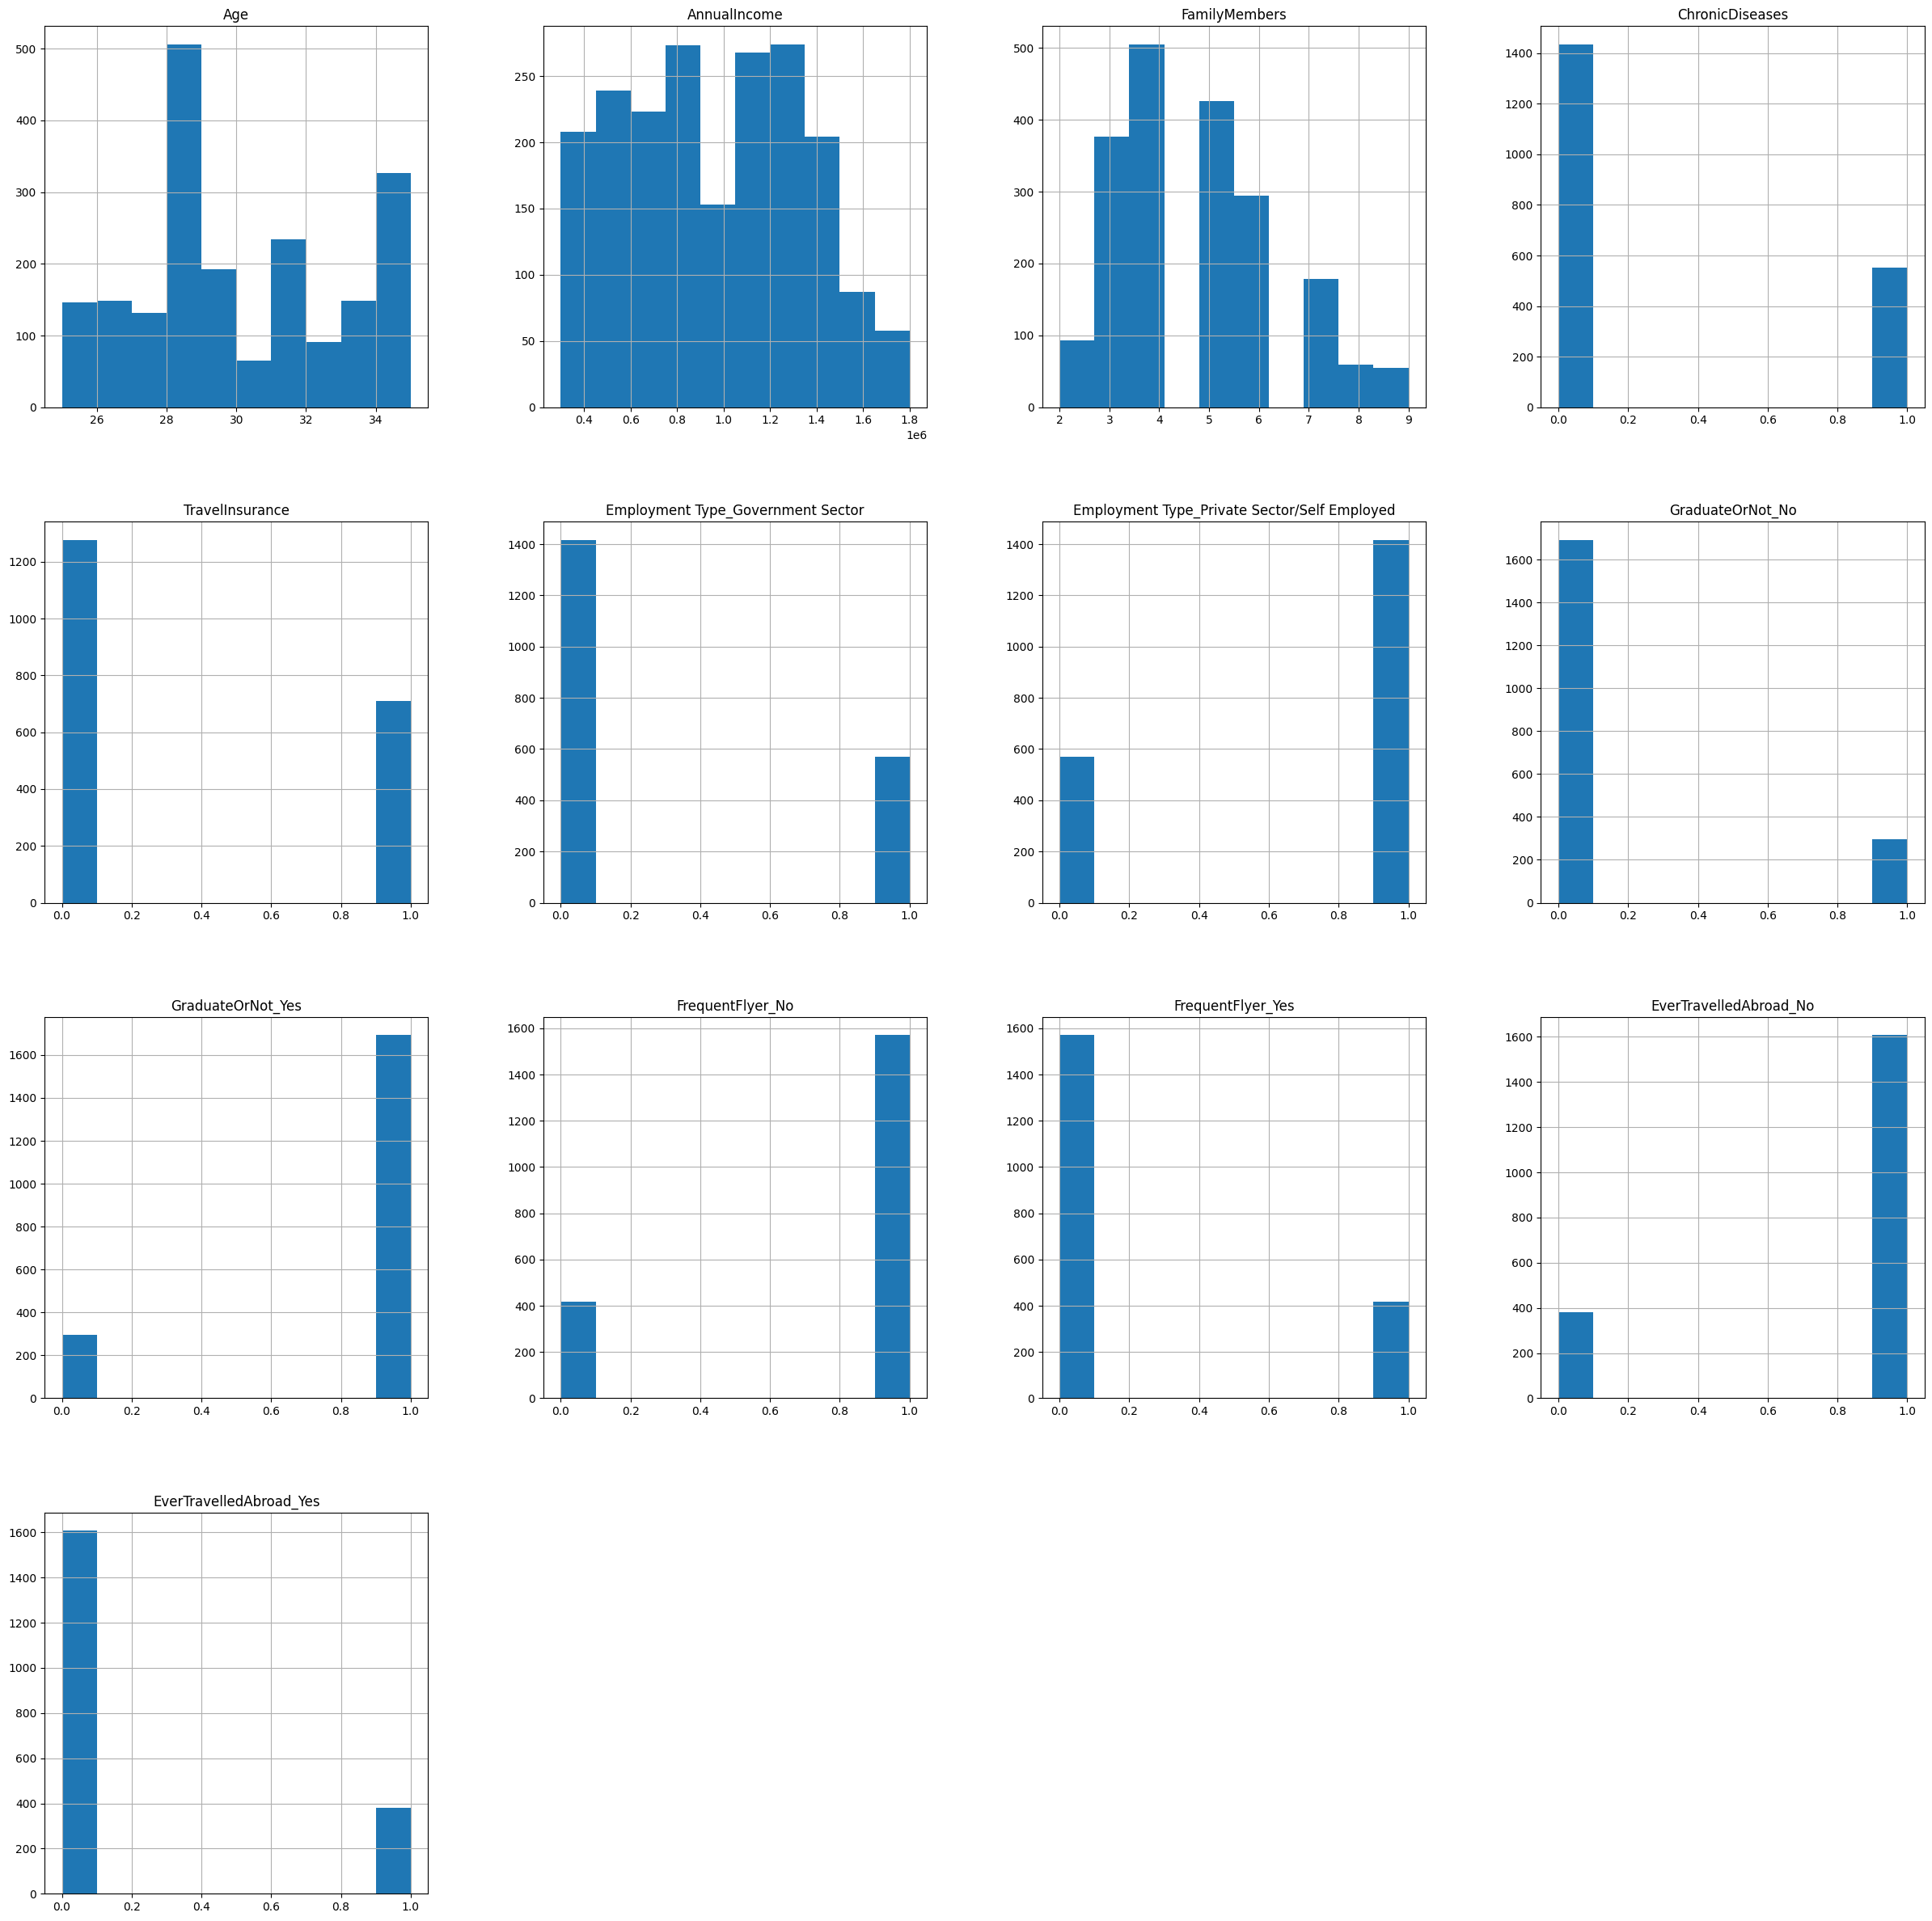

In [ ]:
# Drawing histograms to check the variable's distribution
import matplotlib.pyplot as plt
df.hist(figsize=(30,30))
plt.show()

**3. Split the dataset into training, validation and test set**

In [ ]:
feature_names = df.columns.tolist()       # Get the list of data features from column names
feature_names.remove("TravelInsurance")   # Remove the label column "TravelInsurance" from the data features
X = df[feature_names].values              # Assign data feature values to variable X

y = df.TravelInsurance.values             # Assign data label values to variable y

In [ ]:
# Show data feature shape
X.shape

(1987, 12)

In [ ]:
# Show label shape
y.shape

(1987,)

In [ ]:
# Split the data into train/test set using sklearn library
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

**4. Train a Gaussian Naive Bayes Model**

In [ ]:
# Standardize the data using Standard scaler
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
X_normal_train = normalizer.fit_transform(X_train)
X_normal_test = normalizer.transform(X_test)

In [ ]:
# Load the libraries
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB    # Initialize Gaussian Naive Bayes model
naive_model = GaussianNB()

# Define the values of hyperparameter var_smoothing we want to try
grid_search={"var_smoothing":[1e-2, 1e-3, 1e-4, 1e-5,]}

# Set up GridSearchCV to find the best value of hyperparameter var_smoothing, with 5-fold cross validation
naive_cv=GridSearchCV(naive_model, grid_search, cv=5)

In [ ]:
# Train the model using GridSearchCV
naive_normal_plot = naive_cv.fit(X_normal_train, y_train)

In [ ]:
# Show the best value of var_smoothing
naive_normal_plot.best_params_

{'var_smoothing': 0.01}

In [ ]:
# Show the model performance with the best value of var_smoothing
naive_normal_plot.best_score_

0.718705035971223

In [ ]:
# Initialize Gaussian Naive Bayes model with the best value of hyperparameter var_smoothing
naive_normal = GaussianNB(var_smoothing=naive_normal_plot.best_params_['var_smoothing'])

# Train the model
naive_normal.fit(X_normal_train, y_train)

# Test accuracy of the 'best' hyperparameter var_smoothing = 0.01
naive_normal.score(X_normal_test, y_test)

0.7537688442211056

In [ ]:
# Impport libraries to calculate evaluation metrics: precision, recall, f1 score.
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Make prediction on the test data
predicted_label = naive_normal_plot.predict(X_normal_test)

# Calculate evaluation metrics by comparing the prediction with the data label y_test
print(precision_score(predicted_label, y_test))
print(recall_score(predicted_label, y_test))
print(f1_score(predicted_label, y_test))
print(classification_report(predicted_label, y_test))

0.5514018691588785
0.6982248520710059
0.6161879895561357
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       428
           1       0.55      0.70      0.62       169

    accuracy                           0.75       597
   macro avg       0.71      0.74      0.72       597
weighted avg       0.78      0.75      0.76       597



**5. Train a Mixed Naive Bayes Model**

In [ ]:
# Install the library
!pip install git+https://github.com/remykarem/mixed-naive-bayes#egg=mixed_naive_bayes

  Cloning https://github.com/remykarem/mixed-naive-bayes to /tmp/pip-install-l3lya7xr/mixed-naive-bayes_e3dd665a57964468816105baa8d03b1a
  Running command git clone --filter=blob:none --quiet https://github.com/remykarem/mixed-naive-bayes /tmp/pip-install-l3lya7xr/mixed-naive-bayes_e3dd665a57964468816105baa8d03b1a
  Resolved https://github.com/remykarem/mixed-naive-bayes to commit 6d90de8adf75dbef032ad51029ad3782190ec577
  Preparing metadata (setup.py) ... done


In [ ]:
# Import mixed Naive Bayes library
from mixed_naive_bayes import MixedNB

In [ ]:
# Specify the indices of the features which are to follow the categorical distribution (columns 3 to 11).
clf = MixedNB(categorical_features=[3,4,5,6,7,8,9,10,11])

# Train the model using the training set
clf.fit(X_train,y_train)

# Make sample predictions on test set
predicted_label = clf.predict(X_test)

In [ ]:
# Calculate evaluation metrics by comparing the prediction with the data label y_test
print(precision_score(predicted_label, y_test))
print(recall_score(predicted_label, y_test))
print(f1_score(predicted_label, y_test))
print(classification_report(predicted_label, y_test))

0.5467289719626168
0.7358490566037735
0.6273458445040214
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       438
           1       0.55      0.74      0.63       159

    accuracy                           0.77       597
   macro avg       0.72      0.76      0.73       597
weighted avg       0.80      0.77      0.78       597



**6. Evaluation**

Gaussian Naive Bayes (GNB) performs well in terms of precision, but not as well in recall and f1 scores. On the other hand, Mixed Naive Bayes (MNB) performs better in recall and f1 scores. In addition, the difference in precision score between GNB and MNB is pretty closed. So it might seem that MNB performs better in this case.